# Electrostatics lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib
from scipy import optimize
from statistics import stdev, pstdev
from scipy import optimize
from matplotlib.patches import Rectangle

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({'errorbar.capsize': 3})
%precision 20
np.set_printoptions(suppress=True) 

### Useful functions

In [2]:
def linear_fit(x,B):
    return B*x

In [3]:
def func(x,Q, Csis):
    return Q/((eps0*eps_air*A/x)+(Csis)) 
#(eps0*eps_air*A/x) is the capacity of the parallel plates capacitor with distance between plates equal to x

In [4]:
def func_diel(x,Q, k, Csis):
    return Q/((eps0*k*A/x)+(Csis)) 

## First part 
###### Measure V as a function of distance between the parallel plates, after charging the capacitor

When do we start to lose the approximation of plane and parallel plates? 
$d << \sqrt{A} \Rightarrow x << 0.157$ where $A= 2.46 \times 10^2 m^2$

If we consider a factor of 10, we can say that $d = 0.015 m$.

In [5]:
#REMEMBER: error on distance is 0.05+0.05 ("zeroing")
df_1 = pd.read_csv('ES-parte1.txt',delimiter='\t')
df_1

,d,err_d,V_1,V_2,V_3,V_4,V_5,err_V
0,0.001,0.001,26,27,25,20,22,1.3
1,0.003,0.001,41,49,43,33,38,2.0
2,0.006,0.001,60,61,66,41,51,2.0
3,0.009,0.001,68,63,73,43,54,2.0
4,0.011,0.001,70,67,76,47,58,2.0
5,0.016,0.001,73,70,75,49,60,2.0
6,0.021,0.001,74,75,75,51,62,2.0
7,0.026,0.001,78,77,76,53,63,2.0
8,0.031,0.001,80,78,80,53,62,2.0
9,0.036,0.001,82,81,82,54,62,2.0


In [6]:
eps0 = 8.85*10**(-12) # permittivity of free space
eps_air = 1.0006 # dielectric constant of air
Ce = 27*10**(-10) # electrometer capacity (value taken from the manual)

#MEASURED DATA
V = 3000 # d.d.p. applied to the ice pail
D1 = 0.099 # internal diameter
D2 = 0.147 # outer diameter
L = 0.155 # height of the ice-pail
D_pp = 0.032 # proof plane diameter
D_c = 0.177 # condenser face diameter
D_c_err = 0.001 # lenght error

lenght_err = 0.0001 # lenght error

A = np.pi*(D_c/2)**2 # capacitor plate area
A_err = A*((D_c_err/2)/(D_c/2))*2 # error on capacitor plate area

print("Area A=%g, delta_A= %g" % (A, A_err))
print("The approximation to plane and parallel plates ends at d ~ %g m" % (np.sqrt(A)))

Area A=0.0246057, delta_A= 0.000278031
The approximation to plane and parallel plates ends at d ~ 0.156862 m


#### 3 sets of measurements under virtually the same experimental conditions
We fit the charge $Q$ and the capacitance of the rest of the system (cables and electrometer)

In [7]:
popt, pcov = optimize.curve_fit(func, df_1['d'].values, df_1['V_1'].values,sigma=df_1['err_V'],p0=(0,0))
a_11,b_11 = popt
sigma_a_11, sigma_b_11 = np.sqrt(np.diag(pcov))
print("Optimal parameters for Set 1 are: Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a_11, sigma_a_11, b_11, sigma_b_11))

Optimal parameters for Set 1 are: Q = 7.25123e-09, sigma_Q = 3.90656e-10, Csis = 8.4683e-11, sigma_Csis = 5.06985e-12


In [8]:
popt, pcov = optimize.curve_fit(func, df_1['d'].values, df_1['V_2'].values,sigma=df_1['err_V'],p0=(0,0))
a_22,b_22 = popt
sigma_a_22, sigma_b_22 = np.sqrt(np.diag(pcov))
print("Optimal parameters for Set 2 are: Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a_22, sigma_a_22, b_22, sigma_b_22))

Optimal parameters for Set 2 are: Q = 7.86378e-09, sigma_Q = 4.75938e-10, Csis = 9.31261e-11, sigma_Csis = 6.22989e-12


In [9]:
popt, pcov = optimize.curve_fit(func, df_1['d'].values, df_1['V_3'].values,sigma=df_1['err_V'],p0=(0,0))
a_33,b_33 = popt
sigma_a_33, sigma_b_33 = np.sqrt(np.diag(pcov))
print("Optimal parameters for Set 3 are: Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a_33, sigma_a_33, b_33, sigma_b_33))

Optimal parameters for Set 3 are: Q = 7.97644e-09, sigma_Q = 5.75751e-10, Csis = 9.22639e-11, sigma_Csis = 7.36493e-12


In [10]:
popt, pcov = optimize.curve_fit(func, df_1['d'].values, (df_1['V_1'].values+df_1['V_2'].values+df_1['V_3'].values)/3,
                                sigma=df_1['err_V'],p0=(0,0))
a,b = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))
print("Optimal parameters for AVERAGE are: Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a, sigma_a, b, sigma_b))

Optimal parameters for AVERAGE are: Q = 7.69131e-09, sigma_Q = 2.72716e-10, Csis = 8.99554e-11, sigma_Csis = 3.5323e-12


Let's graph the first three sets and the fit

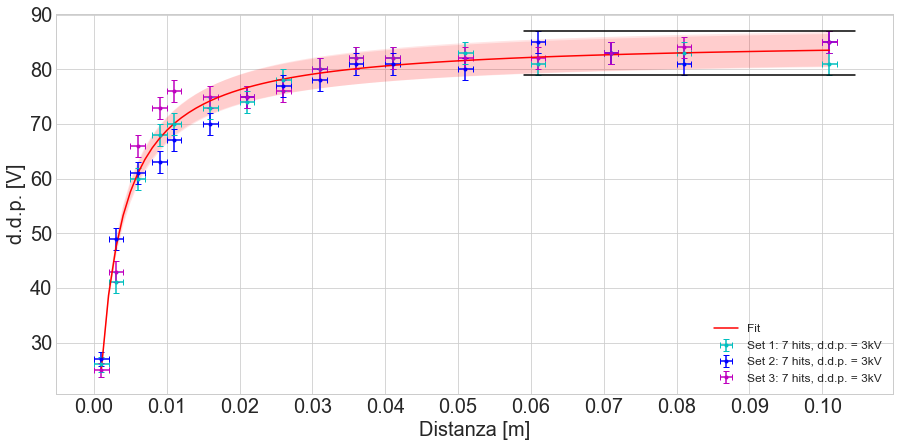

Q (other method) = 83e-10 +- 4e-10


In [11]:
x_lista = np.arange(0.001,0.102,0.001)
yfitted1 = func(x_lista, a,b)

fig, ax = plt.subplots(figsize=(15, 7))
plt.errorbar(x_lista,func(x_lista, a,b), xerr = None,linestyle = "-",color = 'r', label='Fit');
plt.fill_between(x_lista, func(x_lista, a+sigma_a,b), func(x_lista, a-sigma_a,b), facecolor="red", alpha=0.1)
plt.fill_between(x_lista, func(x_lista, a,b+sigma_b), func(x_lista, a,b-sigma_b), facecolor="red", alpha=0.1)

plt.errorbar(df_1['d'].values, df_1['V_1'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values,
             linestyle = "None", fmt='.c', label='Set 1: 7 hits, d.d.p. = 3kV');
plt.errorbar(df_1['d'].values, df_1['V_2'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values, 
             linestyle = "None", fmt='.b', label='Set 2: 7 hits, d.d.p. = 3kV');
plt.errorbar(df_1['d'].values, df_1['V_3'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values, 
             linestyle = "None", fmt='.m', label='Set 3: 7 hits, d.d.p. = 3kV');

x_lista_1 = np.linspace(0.059,max(df_1['d'].values)+0.0035,1000)
ymax = np.ones(1000)*87
ymin = np.ones(1000)*79
plt.plot(x_lista_1,ymax,  color="black")
plt.plot(x_lista_1,ymin,  color="black")

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xticks(np.arange(0, 0.11, step=0.01))
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt.legend(loc=4, prop={'size': 12});
plt.show()

print(("Q (other method) = %ge-10 +- %ge-10")%((87+79)/2, (87-79)/2))

#### Repeat the experiment, varying at least one boundary condition.

In [12]:
popt, pcov = optimize.curve_fit(func, df_1['d'].values, df_1['V_4'].values, sigma = df_1['err_V'], p0 = (0,0))
a_1, b_1 = popt
sigma_a_1, sigma_b_1 = np.sqrt(np.diag(pcov))
popt, pcov = optimize.curve_fit(func, df_1['d'].values, df_1['V_5'].values, sigma = df_1['err_V'], p0 = (0,0))
a_2, b_2 = popt
sigma_a_2, sigma_b_2 = np.sqrt(np.diag(pcov))
print("Optimal parameters for Set 4: 7 hits, d.d.p. = 2kV are Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a_1, sigma_a_1, b_1, sigma_b_1))
print("Optimal parameters for Set 5: 6 hits, d.d.p. = 3kV are Q = %g, sigma_Q = %g, Csis = %g, sigma_Csis = %g" % (a_2, sigma_a_2, b_2, sigma_b_2))

Optimal parameters for Set 4: 7 hits, d.d.p. = 2kV are Q = 6.09756e-09, sigma_Q = 3.04424e-10, Csis = 1.09019e-10, sigma_Csis = 5.96755e-12
Optimal parameters for Set 5: 6 hits, d.d.p. = 3kV are Q = 7.08122e-09, sigma_Q = 3.04162e-10, Csis = 1.05421e-10, sigma_Csis = 4.97293e-12


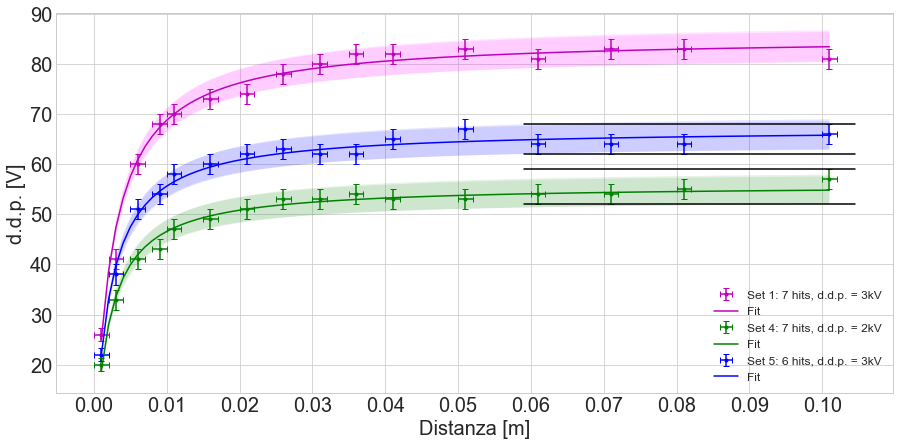

Q4 (other method) = 55.5e-10 +- 3.5e-10
Q5 (other method) = 65e-10 +- 3e-10


In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.errorbar(df_1['d'].values, df_1['V_1'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values, 
             linestyle = "None", fmt='.m', label='Set 1: 7 hits, d.d.p. = 3kV');
plt.errorbar(x_lista,func(x_lista, a,b), xerr = None,linestyle = "-",color = 'm', label='Fit');
plt.fill_between(x_lista, func(x_lista, a+sigma_a,b), func(x_lista, a-sigma_a,b), facecolor="magenta", alpha = 0.1)
plt.fill_between(x_lista, func(x_lista, a,b+sigma_b), func(x_lista, a,b-sigma_b), facecolor="magenta", alpha = 0.1)

#7 hits 2 kV
plt.errorbar(df_1['d'].values, df_1['V_4'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values, 
             linestyle = "None", fmt='.g', label='Set 4: 7 hits, d.d.p. = 2kV');
plt.errorbar(x_lista,func(x_lista, a_1,b_1), xerr = None,linestyle = "-",color = 'g', label='Fit');
plt.fill_between(x_lista, func(x_lista, a_1+sigma_a_1,b_1), func(x_lista, a_1-sigma_a_1,b_1), facecolor="green", alpha=0.1)
plt.fill_between(x_lista, func(x_lista, a_1,b_1+sigma_b_1), func(x_lista, a_1,b_1-sigma_b_1), facecolor="green", alpha=0.1)

#6 hits 3 kV
plt.errorbar(df_1['d'].values, df_1['V_5'].values, xerr = df_1['err_d'].values, yerr = df_1['err_V'].values, 
             linestyle = "None", fmt='.b',label='Set 5: 6 hits, d.d.p. = 3kV');
plt.errorbar(x_lista,func(x_lista, a_2,b_2), xerr = None,linestyle = "-",color = 'b', label='Fit');
plt.fill_between(x_lista, func(x_lista, a_2+sigma_a_2,b_2), func(x_lista, a_2-sigma_a_2,b_2), facecolor="blue", alpha=0.1)
plt.fill_between(x_lista, func(x_lista, a_2,b_2+sigma_b_2), func(x_lista, a_2,b_2-sigma_b_2), facecolor="blue", alpha=0.1)

plt.plot(x_lista_1,np.ones(1000)*68,  color="black")
plt.plot(x_lista_1,np.ones(1000)*62,  color="black")
plt.plot(x_lista_1,np.ones(1000)*59,  color="black")
plt.plot(x_lista_1,np.ones(1000)*52,  color="black")

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt.xticks(np.arange(0, 0.11, step=0.01))
plt.legend(loc=4, prop={'size': 12});
plt.show()

print(("Q4 (other method) = %ge-10 +- %ge-10")%((59+52)/2, (59-52)/2))
print(("Q5 (other method) = %ge-10 +- %ge-10")%((68+62)/2, (68-62)/2))

In [14]:
C_sis = (b_11+b_22+b_33+b_1+b_2)/5
C_sis_err = np.sqrt((sigma_b_11*3/b_11)**2+(sigma_b_22*3/b_22)**2+(sigma_b_33*3/b_33)**2+(sigma_b_1*3/b_1)**2+(sigma_b_2*3/b_2)**2)*C_sis/5
print(("Capacity of the system: %g +- %g")%(C_sis,C_sis_err))

Capacity of the system: 9.69027e-11 +- 8.15082e-12


By experimentally cross-checking the assumptions made, is it possible to derive an estimate of the charge transferred to the capacitor from the measurements made?

## Second part
###### From a preliminary qualitative analysis of the data from the first part, choose a suitable distance d and measure V as Q varies.

With the sphere connected to the generator, charge the rod on the sphere, transfer the charge to the capacitor and measure V.
We hit the capacitor and take the measurement again and again until we get about 20 hits.
The aim is to check that there is n times more charge for every n strokes. 

In [15]:
df_2 = pd.read_csv('ES-parte2.txt',delimiter='\t')
df_2

,b,V_1,V_2,V_3,err_V1,err_V2,err_V3
0,1,2.8,5.5,3.6,1.1,1.1,1.1
1,2,5.6,11.0,7.3,1.1,1.1,1.1
2,3,8.1,16.0,10.0,1.1,1.3,1.3
3,5,14.0,26.0,17.0,1.3,1.3,1.3
4,8,22.0,43.0,27.0,1.3,2.0,1.3
5,10,27.0,55.0,36.0,1.3,2.0,2.0
6,12,32.0,65.0,42.0,2.0,2.0,2.0
7,15,40.0,82.0,54.0,2.0,2.0,2.0
8,18,49.0,97.0,63.0,2.0,2.0,2.0
9,20,55.0,NaN,70.0,2.0,NaN,2.0


In [16]:
n=10
B1, pcov_1 = optimize.curve_fit(linear_fit, df_2['b'].values, df_2['V_1'].values,sigma=df_2['err_V1'])
B2, pcov_2 = optimize.curve_fit(linear_fit, df_2['b'].values[:-1], df_2['V_2'].values[:-1],sigma=df_2['err_V2'][:-1])
B3, pcov_3 = optimize.curve_fit(linear_fit, df_2['b'].values, df_2['V_3'].values,sigma=df_2['err_V3'])

sigma_B1 = np.sqrt(np.diag(pcov_1))
sigma_B2 = np.sqrt(np.diag(pcov_2))
sigma_B3 = np.sqrt(np.diag(pcov_3))

X_fit = np.arange(0, df_2['b'].values.max()+0.5, 0.001)
Y_fit_1 = B1*X_fit
Y_fit_2 = B2*X_fit
Y_fit_3 = B3*X_fit

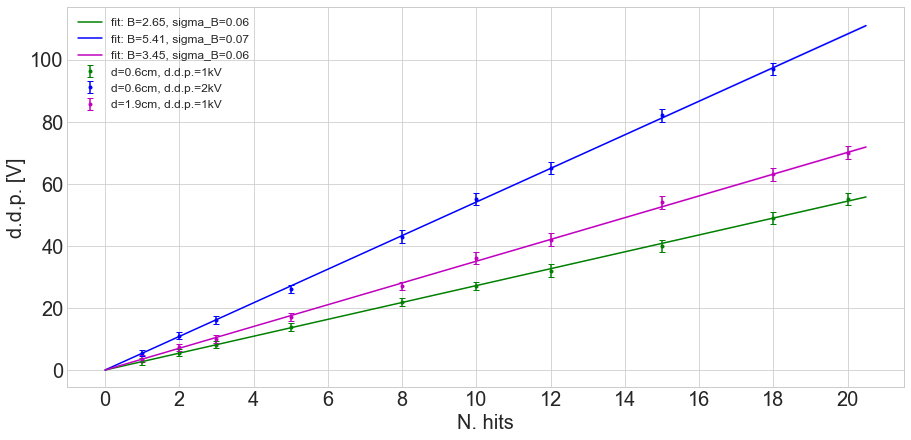

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.errorbar(df_2['b'].values, df_2['V_1'].values, xerr = None, yerr = df_2['err_V1'] , 
             linestyle = None, fmt='.g', label='d=0.6cm, d.d.p.=1kV');
plt.plot(X_fit,Y_fit_1, color = 'g', label='fit: B=2.65, sigma_B=0.06');
plt.fill_between(X_fit, (B1+sigma_B1)*X_fit, (B1-sigma_B1)*X_fit, facecolor="g", alpha=0.1)

plt.errorbar(df_2['b'].values, df_2['V_2'].values, xerr = None, yerr = df_2['err_V2'] , 
             linestyle = None, fmt='.b', label='d=0.6cm, d.d.p.=2kV');
plt.plot(X_fit,Y_fit_2, color = 'b', label = 'fit: B=5.41, sigma_B=0.07')
plt.fill_between(X_fit, (B2+sigma_B2)*X_fit, (B2-sigma_B2)*X_fit, facecolor="blue", alpha=0.1)

plt.errorbar(df_2['b'].values, df_2['V_3'].values, xerr = None, yerr = df_2['err_V3'] , 
             linestyle = None, fmt='.m', label='d=1.9cm, d.d.p.=1kV');
plt.plot(X_fit,Y_fit_3, color = 'm', label='fit: B=3.45, sigma_B=0.06');
plt.fill_between(X_fit, (B3+sigma_B3)*X_fit, (B3-sigma_B3)*X_fit, facecolor="magenta", alpha=0.1)

plt.xlabel('N. hits', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt.xticks(np.arange(0, 21, step=2))
plt.legend(loc=2, prop={'size': 12});
plt.show()

Is it possible to estimate the amount of charge transferred to the capacitor? Is it always the same? What is the best way to measure it?

#### Graphing the charge measurement of a hit

In [18]:
x = np.array([2.9, 3.0, 2.7, 2.6 , 3.2, 2.8, 2.6, 3.0, 3.4, 3.2,  3.1, 3.1, 2.9, 3.0, 2.8, 2.9, 3.0, 2.9, 2.6, 2.8, 
              3.2, 2.9, 3.0, 2.7, 2.9, 2.5, 3.0, 3.2, 3.0, 2.9, 3.2, 2.8, 2.6, 2.8, 2.9, 2.7, 2.9, 2.8, 2.9, 2.7, 2.9,
              2.6, 2.8, 3.0, 2.8, 3.1, 3.0, 2.8, 3.0, 2.7])

print(len(x))

50


2.8960000000000004 0.19268246057242705 50


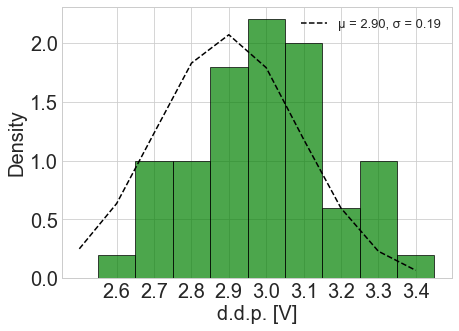

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
mu = x.mean()
sigma = stdev(x)
print(mu,sigma,len(x))   
num_bins = 9
n, bins, patches = plt.hist(x, num_bins, density = 1, stacked = True, alpha = 0.7, align='right', color='green', 
                            edgecolor='black')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black', label = 'μ = 2.90, σ = 0.19')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.xlabel('d.d.p. [V]', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.xticks(np.arange(2.6, 3.45, step=0.1))


plt.legend(prop={'size': 13});
plt.show()

#### Discuss in relation to the law $Q = CV$
We use the mean of the distribution above to compute the average value of charge of a hit
$Q = C V= (\frac{\epsilon_{r}\epsilon_{0} A}{d}+ C_{sis}) \cdot \mu_{V}$

In [20]:
d = 0.006 #distance between plates
d_err= 0.001 #distance between plates error (0.0005+0.0005)

A_pp = np.pi*(D_pp/2)**2 # proof plane area
A_pp_err = A_pp*2*(lenght_err/D_pp) # error on proof plane area

Cc = eps_air*eps0*A/d # capacitor capacity
Cc_err = Cc*np.sqrt((A_err/A)**2+(d_err/d)**2) #capacitor capacitance error

#we use the mean of the distribution above to compute the average value of charge of a hit
Q = (C_sis+Cc) * mu
Q_err = np.sqrt(((Cc_err + C_sis_err)/(Cc + C_sis))**2+(df_2['err_V2'].values[0]/df_2['V_2'].values[0])**2)*Q

print(("Charge transferred by a hit = (%g +- %g) C")%(Q,Q_err))

Charge transferred by a hit = (3.85799e-10 +- 8.74578e-11) C


## Third part
###### We connect the capacitor to the voltage generator so that there is a d.d.p. of 3000 V between the two plates. We measure the charge on the capacitor as the distance d between the plates varies.

In [21]:
df_3 = pd.read_csv('ES-parte3.txt',delimiter='\t')
df_3['err'] = [1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3]
df_3

,d,err_d,V_1,err_V,err
0,0.006,0.001,21,1.3,1.3
1,0.011,0.001,21,1.3,1.3
2,0.016,0.001,21,1.3,1.3
3,0.021,0.001,20,1.3,1.3
4,0.026,0.001,18,1.3,1.3
5,0.031,0.001,18,1.3,1.3
6,0.036,0.001,16,1.3,1.3
7,0.041,0.001,16,1.3,1.3
8,0.046,0.001,16,1.3,1.3
9,0.051,0.001,16,1.3,1.3


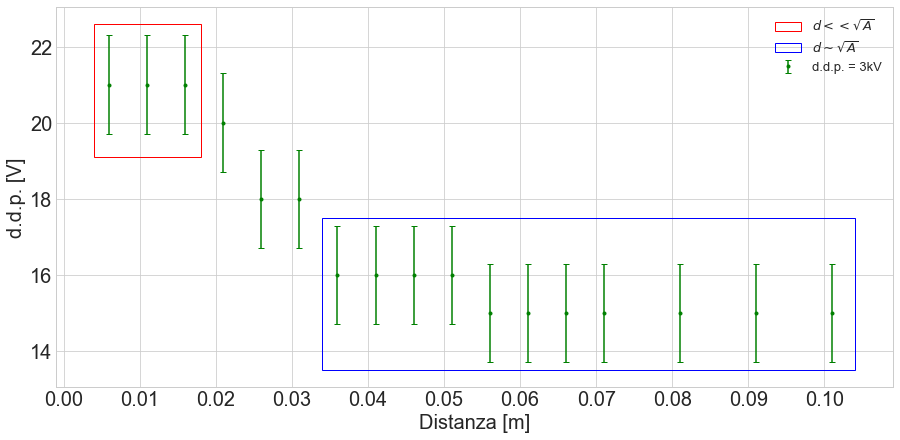

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.errorbar(df_3['d'].values, df_3['V_1'].values, xerr = None, yerr = df_3['err'] , 
             linestyle = None, fmt='.g', label='d.d.p. = 3kV');
#plt.plot(d2,Vsimulated, color = 'b', label = 'theory')

ax.add_patch(Rectangle(xy=(0.004, 19.1), width=0.014, height=3.5, linewidth=1, color='red', fill=False, 
                               label=r'$d << \sqrt{A}$'))
ax.add_patch(Rectangle(xy=(0.034, 13.5), width=0.07, height=4, linewidth=1, color='blue', fill=False, 
                               label=r'$d \sim \sqrt{A}$'))

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
#plt. yticks(np.arange(0, 30, step=5))
plt. xticks(np.arange(0, 0.11, step=0.01))
plt.legend(loc=1, prop={'size': 13});
plt.show()
#due curve/una fascia

In the ideal case, a hyperbolic trend should be observed, with an asymptotic value tending to 0. But this is not the case: the reason is that we should take into account the capacitance of the wires connecting the capacitor to the electrometer, but also the fact that we lose the approximation of flat and parallel plates.

## Fourth part
dielectric 1.15 cm
###### Measure the d.o.p. as a function of the distance between the plates of the capacitor, after having charged it, and having placed a layer of dielectric material between the plates.
We expect that in the data set with the dielectric, the "elbow" comes later, about 4 cm

In [23]:
df_4 = pd.read_csv('ES-parte4.txt',delimiter='\t')
df_4

,d,err_d,V_1,V_2,err_V
0,0.016,0.001,45,70,2
1,0.021,0.001,61,70,2
2,0.026,0.001,68,73,2
3,0.031,0.001,69,71,2
4,0.036,0.001,72,76,2
5,0.041,0.001,76,76,2
6,0.046,0.001,76,74,2
7,0.051,0.001,75,77,2
8,0.056,0.001,77,76,2
9,0.061,0.001,77,78,2


In [24]:
popt, pcov = optimize.curve_fit(func, df_4['d'].values, df_4['V_2'].values,sigma=df_4['err_V'] ,p0=(0,0))
a_3,b_3 = popt
sigma_a_3, sigma_b_3 = np.sqrt(np.diag(pcov))

#dielectric
popt, pcov = optimize.curve_fit(func_diel, df_4['d'].values, df_4['V_1'].values,sigma=df_4['err_V'] ,p0=(0,4,C_sis))
a_4,k_4,b_4 = popt
sigma_a_4,sigma_k_4, sigma_b_4 = np.sqrt(np.diag(pcov))

In [25]:
print("Optimal parameters for DIELECTRIC are Q = %g, sigma_Q = %g, k= %g, sigma_k= %g,Csis = %g, sigma_Csis = %g"
      % (a_4, sigma_a_4,k_4, sigma_k_4,b_4, sigma_b_4 ))
print("Optimal parameters for NO D. are Q = %g, sigma_Q = %g,  k = %g, sigma_k = %g, Csis = %g, sigma_Csis = %g" % (a_3, sigma_a_3, k_4, sigma_k_4,b_3, sigma_b_3))

Optimal parameters for DIELECTRIC are Q = 3.63407e-08, sigma_Q = 0.0364795, k= 19.4782, sigma_k= 1.95523e+07,Csis = 4.02744e-10, sigma_Csis = 0.000404283
Optimal parameters for NO D. are Q = 5.69846e-09, sigma_Q = 7.51336e-10,  k = 19.4782, sigma_k = 1.95523e+07, Csis = 6.99792e-11, sigma_Csis = 9.88349e-12


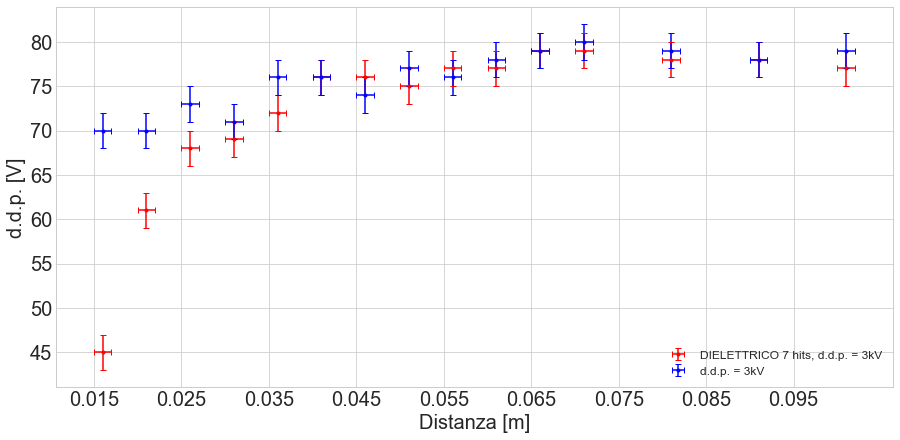

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.errorbar(df_4['d'].values, df_4['V_1'].values, xerr = df_4['err_d'] , yerr = df_4['err_V'] , 
             linestyle = None, fmt='.r', label='DIELETTRICO 7 hits, d.d.p. = 3kV');
plt.errorbar(df_4['d'].values, df_4['V_2'].values, xerr = df_4['err_d'], yerr = df_4['err_V'], linestyle = None, 
             fmt='.b', label='d.d.p. = 3kV');

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt. xticks(np.arange(df_4['d'].min()-0.001, df_4['d'].max()+0.001, step=0.01))
plt.legend(loc=4, prop={'size': 12});
plt.show()

We calculate the dielectric constant

In [27]:
d = df_4['d'].values[0] #Vi = df_4['V_2'].values[0] #voltage without solenoid
Vi = df_4['V_2'].values[0] #voltage without dielectric
#Dielectric thickness = 1.15
Cc = eps_air*eps0*A/d #capacitance capacitor
Cc_err = Cc*np.sqrt((A_err/A)**2+(d_err/d)**2) #capacitor capacitance error

C_p = eps_air*eps0*A/df_4['d'].values[0]
#error for the flat-faced capacitor are measured independently, because the instrument is different
C_p_err = Cc*np.sqrt((A_err/A)**2+(df_4['err_d'].values[0]/df_4['d'].values[0])**2)
Vf = df_4['V_1'].values[0] #voltage with dielectric
V_err = df_4['err_V'].values[0] #2V

eps = (C_sis*(Vi-Vf)+C_p*Vi)/(C_p*Vf) #according to manual
num_err = np.sqrt((C_sis_err/C_sis)**2+((2*V_err)/(Vi-Vf))**2) +(np.sqrt((C_p_err/C_p)**2 + (V_err/Vi)**2)) # relative numerator error 
den_err = np.sqrt((C_p_err/C_p)**2+(V_err/Vf)**2) # relative denominator error
eps_err = np.sqrt(den_err**2+num_err**2)*eps # epsilon_r error

print(("epsilon_r = (%.1f +- %.1f)")%(eps,eps_err))

epsilon_r = (5.5 +- 1.4)
